# **TASK-3 IRIS FLOWER CLASSIFICATION**

Import the Libraries

In [28]:
# Importing the library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [29]:
# Loading the dataset into pandas dataframe

df=pd.read_csv('/content/Iris.csv')

In [30]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
# # Display the number of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [33]:
df=df.drop(columns='Id')

Explore Data Analysis

<Axes: xlabel='Species', ylabel='count'>

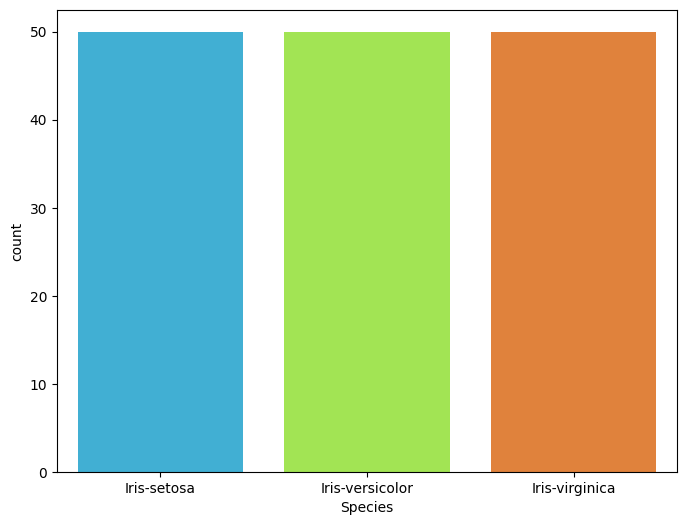

In [34]:
# Countplot
plt.figure(figsize=(8,6))
sns.countplot(x='Species',data=df, palette='turbo')

<Axes: >

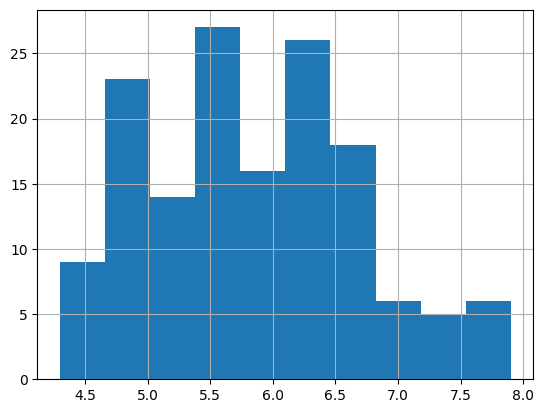

In [35]:
# Histograms
df['SepalLengthCm'].hist()

<Axes: >

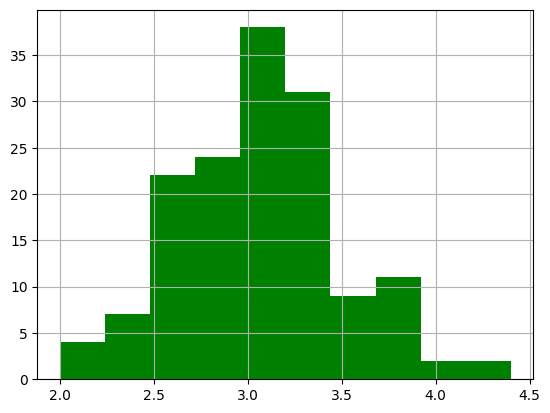

In [36]:
df['SepalWidthCm'].hist(color='green')

<Axes: >

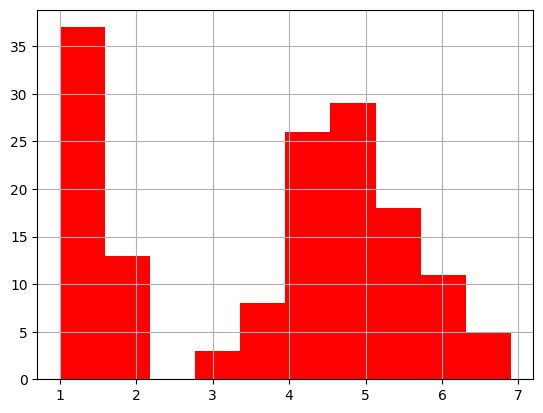

In [37]:
df['PetalLengthCm'].hist(color='red')

<Axes: >

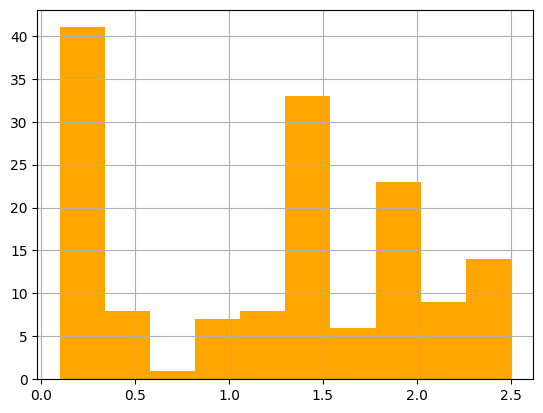

In [38]:
df['PetalWidthCm'].hist(color='orange')

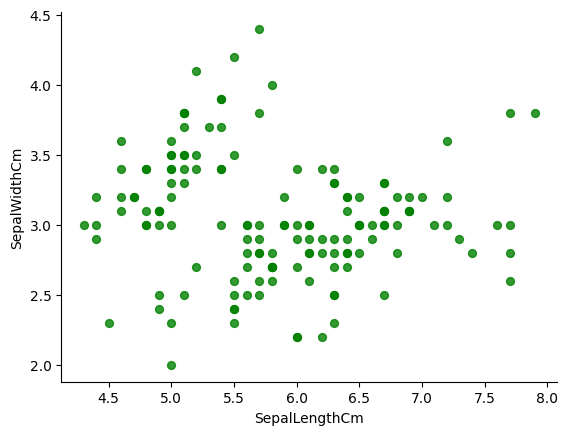

In [39]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', s=32, alpha=.8,color='green')
plt.gca().spines[['top', 'right',]].set_visible(False)

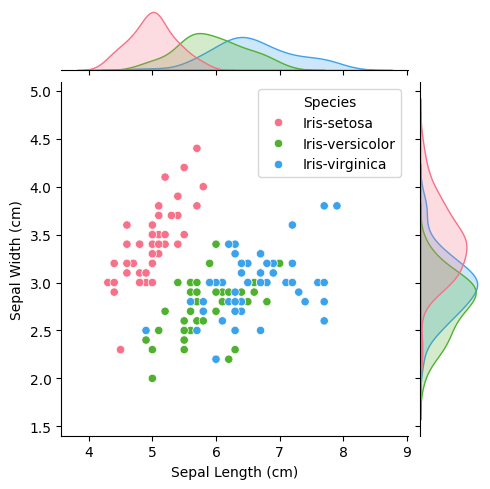

In [40]:
import seaborn as sns

# Define a custom color palette
palette = sns.color_palette("husl", 3)  # Generating a palette with 3 distinct colors

sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species', palette=palette, height=5)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


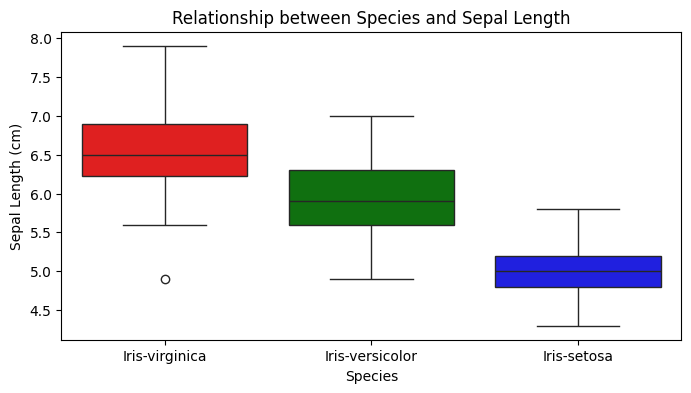

In [41]:
import seaborn as sns

# Define a custom color palette
palette = ['red', 'green', 'blue']

plt.figure(figsize=(8,4))
sns.boxplot(x='Species', y='SepalLengthCm', data=df.sort_values('SepalLengthCm', ascending=False), palette=palette)
plt.title('Relationship between Species and Sepal Length')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

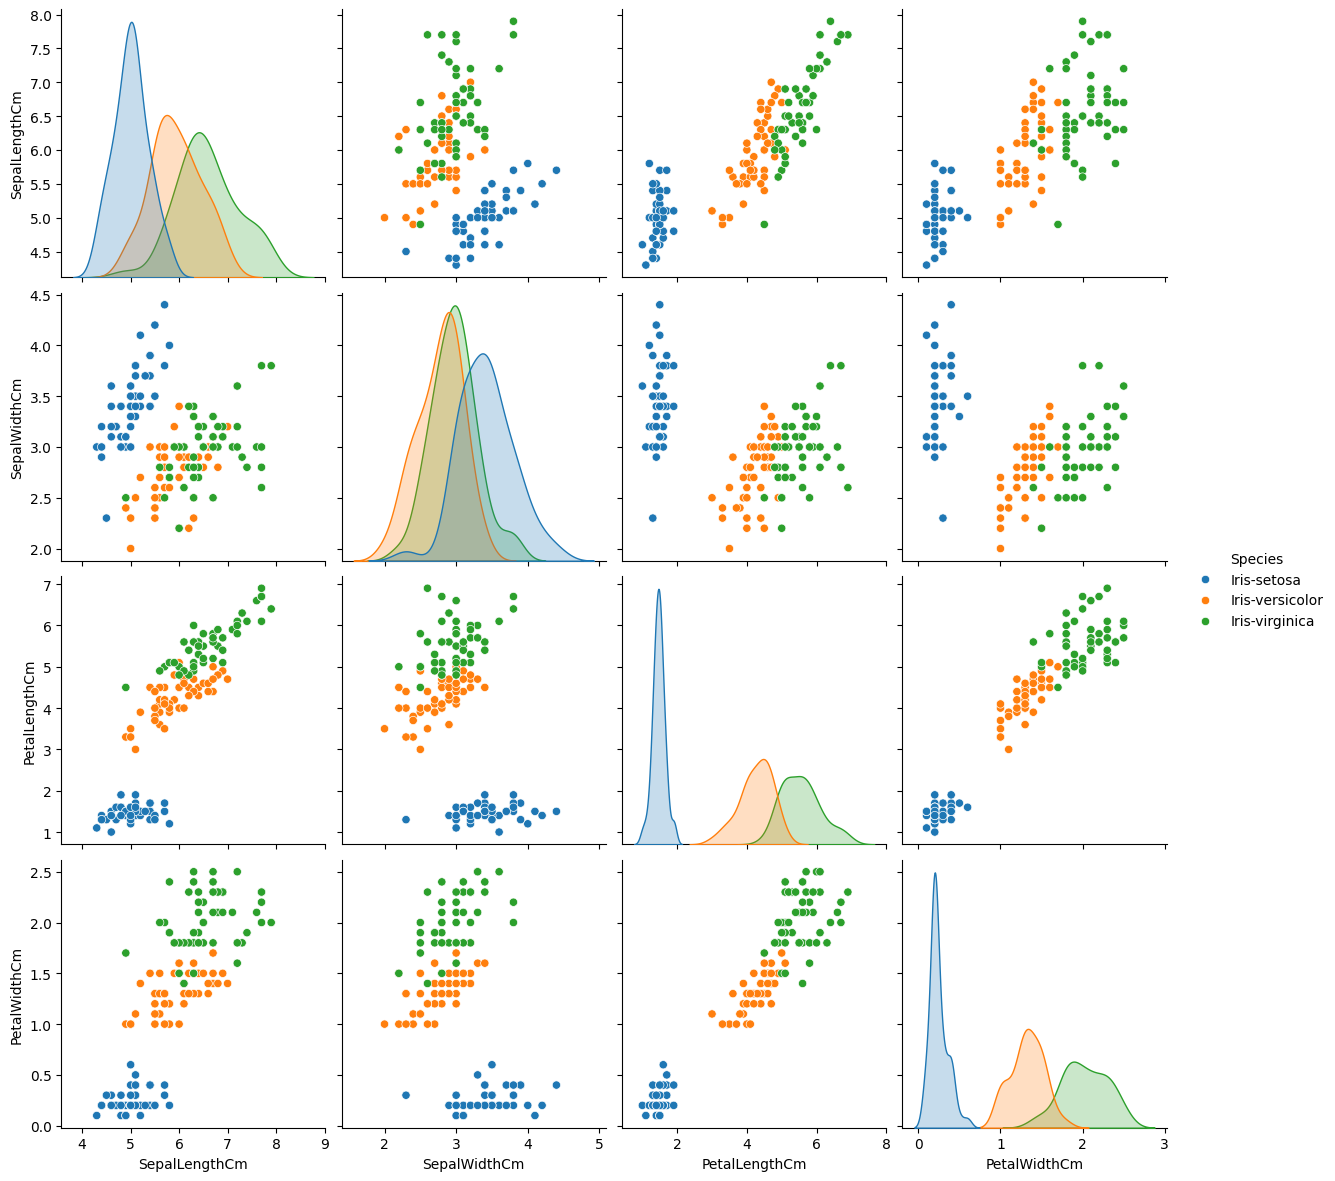

In [42]:
# Pairplot
sns.pairplot(df,hue='Species',size=3)

In [43]:
# Compute the correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

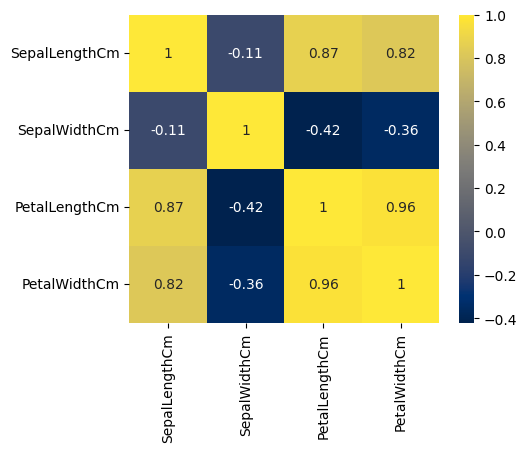

In [44]:
# Displaying the correlation using Heatmap
corr=df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='cividis')

Model Training

In [45]:
# Splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
Y=df['Species']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

4.1 Logistic Regression

In [46]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
acc_lr = model1.score(X_test, Y_test) * 100
print("Accuracy (Logistic Regression): ", acc_lr)

Accuracy (Logistic Regression):  97.77777777777777


4.2 K-Nearest Neighbors

In [47]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train,Y_train)
acc_knn = model2.score(X_test, Y_test)*100
print("Accuracy (KNN): ",acc_knn)

Accuracy (KNN):  97.77777777777777


4.3 Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train,Y_train)
acc_rfc=model3.score(X_test,Y_test)*100
print("Accuracy (Random Forest Classifier): ",acc_rfc)

Accuracy (Random Forest Classifier):  95.55555555555556


4.4 Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train,Y_train)
acc_dct=model3.score(X_test,Y_test)*100
print("Accuracy (Decision Tree): ",acc_dct)


Accuracy (Decision Tree):  95.55555555555556


Final output


# Visualising the accuracy

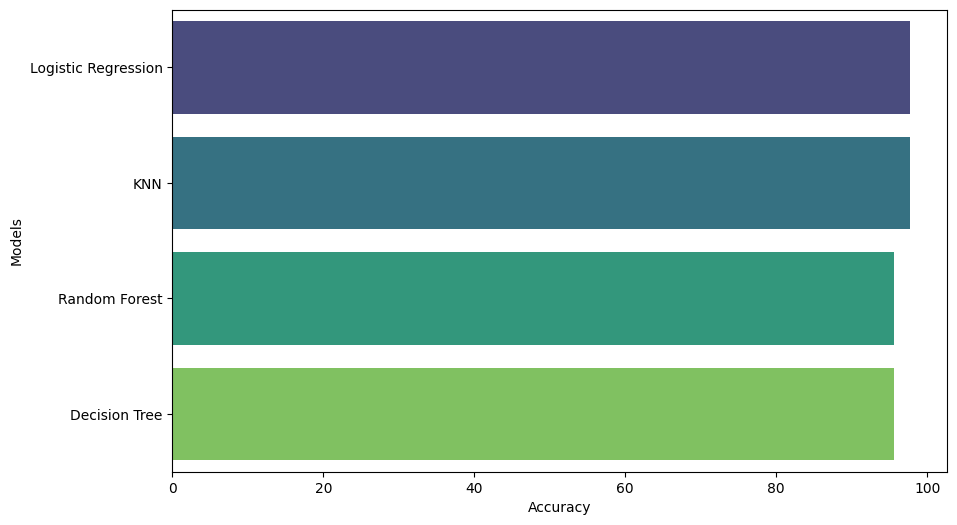

In [52]:
plt.figure(figsize=(10, 6))

model_acc = [acc_lr, acc_knn, acc_rfc, acc_dct]
model_name = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree']

plt.xlabel("Accuracy")
plt.ylabel("Models")

sns.barplot(x=model_acc, y=model_name, palette='viridis')
plt.show()

Logistic Regression and KNN model gave the best performance with 97.77% accuracy

Thank You